In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc

In [36]:
df_offers = pd.read_parquet('data/offer_metadata.parquet', engine="pyarrow")

In [40]:
#num unique of each col
for col in df_offers.columns:
    print(f"{col}: {df_offers[col].nunique()} unique values")
df_offers.info()

id3: 4164 unique values
id9: 1614 unique values
f375: 2 unique values
f376: 21 unique values
id10: 2 unique values
f378: 1252 unique values
f374: 133 unique values
id8: 300 unique values
id12: 669 unique values
id13: 672 unique values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id3     4164 non-null   int32  
 1   id9     4164 non-null   object 
 2   f375    4164 non-null   int32  
 3   f376    978 non-null    float64
 4   id10    4164 non-null   object 
 5   f378    4164 non-null   object 
 6   f374    3887 non-null   object 
 7   id8     3887 non-null   object 
 8   id12    4164 non-null   object 
 9   id13    4164 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 292.9+ KB


In [39]:
df_offers.drop(columns=['id11', 'f377'], inplace=True, errors='ignore')

In [41]:
df_offers.head()

,id3,id9,f375,f376,id10,f378,f374,id8,id12,id13
0,70687,FO5O,2,5.0,1,N,None,None,2018-01-01 00:00:00,2099-12-31 23:59:59
1,900002526,UGE,2,100.0,1,N,None,None,2014-10-20 00:00:00,2099-12-31 23:59:59
2,900002864,UTP,1,100.0,1,N,None,None,2016-07-19 00:00:00,2099-12-31 23:59:59
3,19508,o,2,NaN,1,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59
4,35903,o,2,NaN,1,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59


In [32]:
#sort based on 'id9'and id3 df_ofers
df_offers = df_offers.sort_values(['id9', 'f375']).reset_index(drop=True)
print(df_offers.shape)
df_offers.head(10)

(4164, 17)


,id3,id9,f375,f376,f377,id10,id11,f378,f374,id8,id12,id13,offer_type,source,segment,details,tag
0,97131,$ADC,1,NaN,None,1,None,N,Eating Places,58120000,2023-09-26 00:00:00,2025-12-31 23:59:59,missing,None,None,None,None
1,59450,$CPC,2,100.0,None,1,None,N,"Miscellaneous Personal Services, Nec",72990000,2023-09-20 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
2,72295,$CPC,2,100.0,None,1,None,N,"Miscellaneous Personal Services, Nec",72990000,2023-09-19 00:00:00,2023-09-19 23:59:59,missing,None,None,None,None
3,70618,$DEC,2,100.0,None,1,None,N,None,None,2021-07-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
4,901196,$EC,2,100.0,None,1,None,N,None,None,2021-07-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
5,926389,$EC,2,100.0,None,1,None,N,None,None,2023-01-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
6,7215,$HC,2,100.0,None,1,None,N,None,None,2021-07-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
7,97155,1,1,NaN,None,1,None,gao$scbuyeectmaspo$omia1ooa17st,None,None,2023-01-30 00:00:00,2023-07-30 23:59:59,standard,gao,scbuyeectmaspo,omia1ooa17st,None
8,209183,1,1,NaN,None,1,None,gao$scbuyeectmaspo$omia1ooa1b2st,General Warehousing & Storage,42250000,2023-09-01 00:00:00,2024-02-29 23:59:59,standard,gao,scbuyeectmaspo,omia1ooa1b2st,None
9,63641,1,2,NaN,None,1,None,ga$scbuyeectmaspo$omia1ooab7lo4sc(o$st,None,None,2023-01-30 00:00:00,2023-07-30 23:59:59,extended,ga,scbuyeectmaspo,omia1ooab7lo4sc(o,st


In [ ]:
null_id9 = df_offers[df_offers['f376'].isnull()]['id9'].unique()
print(f"Number of unique id9 values with f376 as null: {len(null_id9)}")


Number of unique id9 values with f376 as null: 1356


3186
21


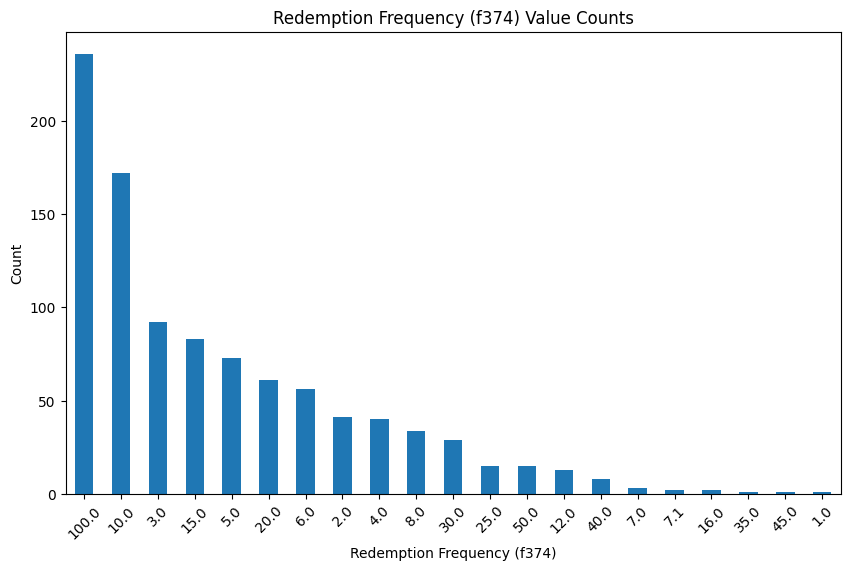

In [31]:
print(df_offers['f376'].isnull().sum())  # Count of null values in f374
print(df_offers['f376'].nunique())  # Count of unique values in f
df_offers['f376'].value_counts().plot(kind='bar', figsize=(10, 6), title='Redemption Frequency (f374) Value Counts')
plt.xlabel('Redemption Frequency (f374)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
print(df_offers['f378'].value_counts().head(50))
df_offers['f378'].value_counts()['N']/df_offers.shape[0]  # Percentage of unique values in f378

f378
N                                                 2404
gao$scbuyeectsamo$ioompoasb1st                      17
gao$scbuyeectsamo$ioompoatb1st                      15
ga$scbuyeebctsamo$ioomepfuamioob1lo3sc(o$st         12
gao$scbuyeectsamo$ioompoamb1st                      11
gao$scbuyeectsamo$ioompoacb1st                      10
gao$scbuyeectsamo$ioompoapb1st                      10
gao$scbuyeectsamo$ioompoab1st                       10
g3baascbuyeectmpoakb1lo$bitscst                      9
gao$scbuyeectsamo$ioompoasb9st                       8
gao$scbuyeectsamo$ioompoaab1st                       8
gao$scbuyeectsamo$ioompoadb1st                       7
gao$scbuyeectsamo$ioompoagb1st                       7
gao$scbuyeectsamo$ioompoalb1st                       7
gao$scbuyeectsamo$ioompoanb1st                       6
g3baascbuyeectmpoaeb1lo$bitscst                      6
gao$scbuyeectsamo$ioompoajb1st                       6
g6baascbuyeectmpoatb1lo$bitscst                      6
g8baa

0.5773294908741594

In [ ]:
import pandas as pd
# Define the parsing function
def classify_offering_body(body):
    if pd.isna(body) or body == 'N':
        return {'offer_type': 'missing','source': None,'segment': None,'details': None,'tag': None}
    parts = body.split('$')
    count = len(parts) - 1

    if count == 2:
        return {'offer_type': 'standard','source': parts[0],'segment': parts[1],'details': parts[2],'tag': None}
    elif count == 3:
        return {'offer_type': 'extended','source': parts[0],'segment': parts[1],'details': parts[2],'tag': parts[3]}
    else:
        return {
            'offer_type': 'unstructured',
            'source': None,
            'segment': None,
            'details': body,
            'tag': None
        }

parsed = df_offers['f378'].apply(classify_offering_body)
parsed_df = pd.DataFrame(parsed.tolist())
df_offers = pd.concat([df_offers, parsed_df], axis=1)
df_offers


,id3,id9,f375,f376,f377,id10,id11,f378,f374,id8,id12,id13,offer_type,source,segment,details,tag
0,97131,$ADC,1,NaN,None,1,None,N,Eating Places,58120000,2023-09-26 00:00:00,2025-12-31 23:59:59,missing,None,None,None,None
1,59450,$CPC,2,100.0,None,1,None,N,"Miscellaneous Personal Services, Nec",72990000,2023-09-20 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
2,72295,$CPC,2,100.0,None,1,None,N,"Miscellaneous Personal Services, Nec",72990000,2023-09-19 00:00:00,2023-09-19 23:59:59,missing,None,None,None,None
3,70618,$DEC,2,100.0,None,1,None,N,None,None,2021-07-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
4,901196,$EC,2,100.0,None,1,None,N,None,None,2021-07-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,581982,西,2,10.0,None,1,None,N,Grocery Stores,54110103,2023-07-31 08:00:00,2023-09-30 07:59:59,missing,None,None,None,None
4160,687549,西,2,10.0,None,1,None,N,Grocery Stores,54110103,2023-05-31 08:00:00,2023-07-31 07:59:59,missing,None,None,None,None
4161,634675,高イHR,2,15.0,None,1,None,N,Catalog And Mail-Order Houses,59610000,2023-11-30 08:00:00,2023-12-31 07:59:59,missing,None,None,None,None
4162,644413,高イHR,2,15.0,None,1,None,N,Catalog And Mail-Order Houses,59610000,2023-06-20 08:00:00,2023-08-20 07:59:59,missing,None,None,None,None


In [22]:
# show me offer_type	source	segment	details	tag these columns details i want to know the value counts
print(df_offers['offer_type'].value_counts())
print(df_offers['source'].value_counts())
print(df_offers['segment'].value_counts())
print(df_offers['details'].value_counts())
print(df_offers['tag'].value_counts())


offer_type
missing         2404
standard         950
unstructured     593
extended         217
Name: count, dtype: int64
source
gao                                          925
ga                                           213
eb1gao                                        14
g                                              2
g2baaoscbuyeectmaspo                           2
g1baaoscbuyeectmaspo                           2
eb1ga                                          2
t-dnrgao                                       2
eb8ga                                          1
t-dnrao                                        1
isossga                                        1
1eis&s2amtyasafyec(tciottlotaahs>asa>‘m3s      1
g5baaoscbuyeectmaspo                           1
Name: count, dtype: int64
segment
scbuyeectsamo                    744
scbuyeectmaspo                   342
scbuyeebctsamo                    23
scbuyeebctmaspo                    7
scauyeebctsamo                     4
scbuyectsamo    

In [24]:
print(df_offers['f374'].isnull().sum())  # Count of null values in f374
print(df_offers['f374'].nunique())  # Count of unique values in f
df_offers['f374'].value_counts()

277
133


f374
Eating Places                                     802
Family Clothing Stores                            305
Miscellaneous Retail Stores, Nec                  279
Grocery Stores                                    222
Direct Selling Establishments                     186
                                                 ... 
Computer Related Services, Nec                      1
Equipment Rental & Leasing, Nec                     1
Automotive Services, Except Repair & Carwashes      1
Laundry & Garment Services, Nec                     1
Women's & Children's Clothing                       1
Name: count, Length: 133, dtype: int64

In [ ]:
# TODO : from df_offers concatenate offer_type	source	segment	details	tag 
# TODO : from df_offers f374 f375 id10